##تعريف المكتبات 

In [1]:
import numpy as np  # linear algebra
import pandas as pd  # read and wrangle dataframes
import matplotlib.pyplot as plt # visualization
import seaborn as sns # statistical visualizations and aesthetics


from sklearn.base import TransformerMixin # To create new classes for transformations
from sklearn.preprocessing import (FunctionTransformer, StandardScaler) # preprocessing 

from sklearn.decomposition import PCA # dimensionality reduction
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from scipy.stats import boxcox # data transform
from sklearn.model_selection import (train_test_split, KFold , StratifiedKFold, 
                                     cross_val_score, GridSearchCV, 
                                     learning_curve, validation_curve) # model selection modules

from sklearn.pipeline import Pipeline # streaming pipelines
from sklearn.base import BaseEstimator, TransformerMixin # To create a box-cox transformation class
from collections import Counter
import warnings

# load models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from time import time

%matplotlib inline 
warnings.filterwarnings('ignore')
#sns.set_style('whitegrid')
sns.set_style("darkgrid")


In [2]:
BC = pd.read_csv('bc_97.csv')

In [3]:
BC.head()

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,TCa,GPT,GOT,...,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL,CLASS
0,1,60,Tragan,100.0,23.0,0.8,3.4,10.0,20.0,10.0,...,3.4,4.60,13.4,196.0,14.0,150.0,145.0,4.50,107.1,0
1,1,53,Sabha,190.0,27.0,0.6,NaN,9.3,11.0,17.0,...,4.4,5.00,12.5,155.0,NaN,260.0,139.2,4.17,106.4,0
2,1,50,Sabha,150.0,15.0,1.1,3.5,8.5,13.0,10.0,...,5.1,4.46,13.8,312.0,NaN,169.0,140.0,4.00,100.1,0
3,1,36,Obaree-center,80.0,20.0,1.0,4.2,8.0,7.0,13.0,...,3.1,4.33,10.7,212.0,10.0,138.0,136.4,4.06,107.1,0
4,1,30,Obaree-center,80.0,40.0,0.8,3.0,NaN,9.0,15.0,...,4.2,4.13,12.3,243.0,5.0,154.0,NaN,4.00,106.2,0


In [4]:
BC.shape

(2435, 23)

<a id = "6"></a><br>
## Missing Values

In [5]:
#imputing nan values

BC["FBS"].fillna(BC["FBS"].mean(), inplace=True)
BC["Urea"].fillna(BC["Urea"].mean(), inplace=True)
BC["Creatinin"].fillna(BC["Creatinin"].mean(), inplace=True)
BC["ALB"].fillna(BC["ALB"].mean(), inplace=True)
BC["TCa"].fillna(BC["TCa"].mean(), inplace=True)
BC["GPT"].fillna(BC["GPT"].mean(), inplace=True)
BC["GOT"].fillna(BC["GOT"].mean(), inplace=True)
BC["ALP"].fillna(BC["ALP"].mean(), inplace=True)
BC["WBC"].fillna(BC["WBC"].mean(), inplace=True)
BC["HGB"].fillna(BC["HGB"].mean(), inplace=True)
BC["RBC"].fillna(BC["RBC"].mean(), inplace=True)
BC["PLT"].fillna(BC["PLT"].mean(), inplace=True)
BC["ESR"].fillna(BC["ESR"].mean(), inplace=True)
BC["LDH"].fillna(BC["LDH"].mean(), inplace=True)
BC["Na"].fillna(BC["Na"].mean(), inplace=True)
BC["K"].fillna(BC["K"].mean(), inplace=True)
BC["CL"].fillna(BC["CL"].mean(), inplace=True)
BC["CA15"].fillna(BC["CA15"].mean(), inplace=True)
BC["CEA"].fillna(BC["CEA"].mean(), inplace=True)
BC

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,TCa,GPT,GOT,...,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL,CLASS
0,1,60,Tragan,100.0,23.0,0.8,3.400000,10.000,20.0,10.0,...,3.4,4.60,13.4,196.0,14.000000,150.0,145.000000,4.50,107.1,0
1,1,53,Sabha,190.0,27.0,0.6,6.025476,9.300,11.0,17.0,...,4.4,5.00,12.5,155.0,24.520661,260.0,139.200000,4.17,106.4,0
2,1,50,Sabha,150.0,15.0,1.1,3.500000,8.500,13.0,10.0,...,5.1,4.46,13.8,312.0,24.520661,169.0,140.000000,4.00,100.1,0
3,1,36,Obaree-center,80.0,20.0,1.0,4.200000,8.000,7.0,13.0,...,3.1,4.33,10.7,212.0,10.000000,138.0,136.400000,4.06,107.1,0
4,1,30,Obaree-center,80.0,40.0,0.8,3.000000,9.946,9.0,15.0,...,4.2,4.13,12.3,243.0,5.000000,154.0,153.698856,4.00,106.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2430,1,30,Algatroon,146.0,28.0,0.7,4.000000,9.500,63.0,23.0,...,3.9,5.23,11.3,288.0,15.000000,254.0,138.700000,4.35,103.6,1
2431,1,47,Sabha,90.0,32.0,0.8,4.700000,8.800,82.0,23.0,...,4.8,4.57,13.2,249.0,12.000000,254.0,142.300000,4.40,102.7,1
2432,1,43,Sabha,70.0,15.0,0.6,3.500000,8.100,22.0,15.0,...,4.4,4.32,11.1,249.0,8.000000,254.0,137.800000,4.25,110.2,1
2433,1,60,Sabha,98.0,29.0,0.9,4.800000,8.200,51.0,17.0,...,4.5,4.41,12.9,293.0,13.000000,254.0,147.500000,3.15,107.5,1


## outlires by Z-score


In [6]:
BC["ZScore_FBS"] = (BC.FBS - BC.FBS.mean())/(BC.FBS.std())
BC["ZScore_Urea"] = (BC.Urea - BC.Urea.mean())/(BC.Urea.std())
BC["ZScore_creatinine"] = (BC.Creatinin - BC.Creatinin.mean())/(BC.Creatinin.std())
BC["ZScore_ALB"] = (BC.ALB - BC.ALB.mean())/(BC.ALB.std())
BC["ZScore_TCa"] = (BC.TCa - BC.TCa.mean())/(BC.TCa.std())
BC["ZScore_GPT"] = (BC.GPT - BC.GPT.mean())/(BC.GPT.std())
BC["ZScore_GOT"] = (BC.GOT - BC.GOT.mean())/(BC.GOT.std())
BC["ZScore_ALP"] = (BC.ALP - BC.ALP.mean())/(BC.ALP.std())
BC["ZScore_CA15"] = (BC.CA15 - BC.CA15.mean())/(BC.CA15.std())
BC["ZScore_CEA"] = (BC.CEA - BC.CEA.mean())/(BC.CEA.std())
BC["ZScore_WBC"] = (BC.WBC - BC.WBC.mean())/(BC.WBC.std())
BC["ZScore_RBC"] = (BC.RBC - BC.RBC.mean())/(BC.RBC.std())
BC["ZScore_HGB"] = (BC.HGB - BC.HGB.mean())/(BC.HGB.std())
BC["ZScore_PLT"] = (BC.PLT - BC.PLT.mean())/(BC.PLT.std())
BC["ZScore_ESR"] = (BC.ESR - BC.ESR.mean())/(BC.ESR.std())
BC["ZScore_LDH"] = (BC.LDH - BC.LDH.mean())/(BC.LDH.std())
BC["ZScore_Na"] = (BC.Na - BC.Na.mean())/(BC.Na.std())
BC["ZScore_CL"] = (BC.CL - BC.CL.mean())/(BC.CL.std())
BC["ZScore_K"] = (BC.K - BC.K.mean())/(BC.K.std())



In [7]:
BC_FBS_outlier_Z = BC[(BC.ZScore_FBS>3) | (BC.ZScore_FBS<-3)]
BC_Urea_outlier_Z = BC[(BC.ZScore_Urea>3) | (BC.ZScore_Urea<-3)]
BC_creatinine_outlier_Z = BC[(BC.ZScore_creatinine>3) | (BC.ZScore_creatinine<-3)]
BC_ALB_outlier_Z = BC[(BC.ZScore_ALB>3) | (BC.ZScore_ALB<-3)]
BC_TCa_outlier_Z = BC[(BC.ZScore_TCa>3) | (BC.ZScore_TCa<-3)]
BC_GPT_outlier_Z = BC[(BC.ZScore_GPT>3) | (BC.ZScore_GPT<-3)]
BC_GOT_outlier_Z = BC[(BC.ZScore_GOT>3) | (BC.ZScore_GOT<-3)]
BC_ALP_outlier_Z = BC[(BC.ZScore_ALP>3) | (BC.ZScore_ALP<-3)]
BC_CA15_outlier_Z = BC[(BC.ZScore_CA15>3) | (BC.ZScore_CA15<-3)]
BC_CEA_outlier_Z = BC[(BC.ZScore_CEA>3) | (BC.ZScore_CEA<-3)]
BC_WBC_outlier_Z = BC[(BC.ZScore_WBC>3) | (BC.ZScore_WBC<-3)]
BC_RBC_outlier_Z = BC[(BC.ZScore_RBC>3) | (BC.ZScore_RBC<-3)]
BC_HGB_outlier_Z = BC[(BC.ZScore_HGB>3) | (BC.ZScore_HGB<-3)]
BC_PLT_outlier_Z = BC[(BC.ZScore_PLT>3) | (BC.ZScore_PLT<-3)]
BC_ESR_outlier_Z = BC[(BC.ZScore_ESR>3) | (BC.ZScore_ESR<-3)]
BC_LDH_outlier_Z = BC[(BC.ZScore_LDH>3) | (BC.ZScore_LDH<-3)]
BC_Na_outlier_Z = BC[(BC.ZScore_Na>3) | (BC.ZScore_Na<-3)]
BC_K_outlier_Z = BC[(BC.ZScore_CL>3) | (BC.ZScore_CL<-3)]
BC_CL_outlier_Z = BC[(BC.ZScore_K>3) | (BC.ZScore_K<-3)]


In [8]:
BC.isnull().sum()

Sex                  0
Age                  0
Adress               0
FBS                  0
Urea                 0
Creatinin            0
ALB                  0
TCa                  0
GPT                  0
GOT                  0
ALP                  0
CA15                 0
CEA                  0
WBC                  0
RBC                  0
HGB                  0
PLT                  0
ESR                  0
LDH                  0
Na                   0
K                    0
CL                   0
CLASS                0
ZScore_FBS           0
ZScore_Urea          0
ZScore_creatinine    0
ZScore_ALB           0
ZScore_TCa           0
ZScore_GPT           0
ZScore_GOT           0
ZScore_ALP           0
ZScore_CA15          0
ZScore_CEA           0
ZScore_WBC           0
ZScore_RBC           0
ZScore_HGB           0
ZScore_PLT           0
ZScore_ESR           0
ZScore_LDH           0
ZScore_Na            0
ZScore_CL            0
ZScore_K             0
dtype: int64

In [9]:
#assigning nan to the outliers

BC['FBS'].values[BC['ZScore_FBS'] > 3] = np.nan
BC['FBS'].values[BC['ZScore_FBS'] < -3] = np.nan

BC['Urea'].values[BC['ZScore_Urea'] > 3] = np.nan
BC['Urea'].values[BC['ZScore_Urea'] < -3] = np.nan

BC['Creatinin'].values[BC['ZScore_creatinine'] > 3] = np.nan
BC['Creatinin'].values[BC['ZScore_creatinine'] < -3] = np.nan

BC['ALB'].values[BC['ZScore_ALB'] > 3] = np.nan
BC['ALB'].values[BC['ZScore_ALB'] < -3] = np.nan

BC['TCa'].values[BC['ZScore_TCa'] > 3] = np.nan
BC['TCa'].values[BC['ZScore_TCa'] < -3] = np.nan

BC['GPT'].values[BC['ZScore_GPT'] > 3] = np.nan
BC['GPT'].values[BC['ZScore_GPT'] < -3] = np.nan

BC['GOT'].values[BC['ZScore_GOT'] > 3] = np.nan
BC['GOT'].values[BC['ZScore_GOT'] < -3] = np.nan

BC['ALP'].values[BC['ZScore_ALP'] > 3] = np.nan
BC['ALP'].values[BC['ZScore_ALP'] < -3] = np.nan

BC['CA15'].values[BC['ZScore_CA15'] > 3] = np.nan
BC['CA15'].values[BC['ZScore_CA15'] < -3] = np.nan

BC['CEA'].values[BC['ZScore_CEA'] > 3] = np.nan
BC['CEA'].values[BC['ZScore_CEA'] < -3] = np.nan

BC['WBC'].values[BC['ZScore_WBC'] > 3] = np.nan
BC['WBC'].values[BC['ZScore_WBC'] < -3] = np.nan

BC['RBC'].values[BC['ZScore_RBC'] > 3] = np.nan
BC['RBC'].values[BC['ZScore_RBC'] < -3] = np.nan

BC['HGB'].values[BC['ZScore_HGB'] > 3] = np.nan
BC['HGB'].values[BC['ZScore_HGB'] < -3] = np.nan

BC['PLT'].values[BC['ZScore_PLT'] > 3] = np.nan
BC['PLT'].values[BC['ZScore_PLT'] < -3] = np.nan

BC['ESR'].values[BC['ZScore_ESR'] > 3] = np.nan
BC['ESR'].values[BC['ZScore_ESR'] < -3] = np.nan

BC['LDH'].values[BC['ZScore_LDH'] > 3] = np.nan
BC['LDH'].values[BC['ZScore_LDH'] < -3] = np.nan

BC['Na'].values[BC['ZScore_Na'] > 3] = np.nan
BC['Na'].values[BC['ZScore_Na'] < -3] = np.nan

BC['CL'].values[BC['ZScore_CL'] > 3] = np.nan
BC['CL'].values[BC['ZScore_CL'] < -3] = np.nan

BC['K'].values[BC['ZScore_K'] > 3] = np.nan
BC['K'].values[BC['ZScore_K'] < -3] = np.nan


In [10]:
BC.drop(["ZScore_FBS","ZScore_Urea","ZScore_creatinine","ZScore_ALB","ZScore_TCa","ZScore_GPT","ZScore_GOT","ZScore_ALP",
        "ZScore_CA15","ZScore_CEA","ZScore_WBC","ZScore_RBC","ZScore_HGB","ZScore_PLT","ZScore_ESR","ZScore_LDH",
        "ZScore_Na","ZScore_CL","ZScore_K"],axis=1,inplace=True)

BC.isnull().sum()


Sex           0
Age           0
Adress        0
FBS          32
Urea         11
Creatinin    30
ALB           4
TCa          27
GPT           4
GOT           5
ALP          32
CA15          1
CEA           1
WBC           0
RBC          11
HGB           0
PLT           0
ESR          58
LDH          18
Na           13
K             7
CL           64
CLASS         0
dtype: int64

In [11]:
#imputing nan values

BC["FBS"].fillna(BC["FBS"].mean(), inplace=True)
BC["Urea"].fillna(BC["Urea"].mean(), inplace=True)
BC["Creatinin"].fillna(BC["Creatinin"].mean(), inplace=True)
BC["ALB"].fillna(BC["ALB"].mean(), inplace=True)
BC["TCa"].fillna(BC["TCa"].mean(), inplace=True)
BC["GPT"].fillna(BC["GPT"].mean(), inplace=True)
BC["GOT"].fillna(BC["GOT"].mean(), inplace=True)
BC["ALP"].fillna(BC["ALP"].mean(), inplace=True)
BC["WBC"].fillna(BC["WBC"].mean(), inplace=True)
BC["HGB"].fillna(BC["HGB"].mean(), inplace=True)
BC["RBC"].fillna(BC["RBC"].mean(), inplace=True)
BC["PLT"].fillna(BC["PLT"].mean(), inplace=True)
BC["ESR"].fillna(BC["ESR"].mean(), inplace=True)
BC["LDH"].fillna(BC["LDH"].mean(), inplace=True)
BC["Na"].fillna(BC["Na"].mean(), inplace=True)
BC["K"].fillna(BC["K"].mean(), inplace=True)
BC["CL"].fillna(BC["CL"].mean(), inplace=True)
BC["CA15"].fillna(BC["CA15"].mean(), inplace=True)
BC["CEA"].fillna(BC["CEA"].mean(), inplace=True)
BC

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,TCa,GPT,GOT,...,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL,CLASS
0,1,60,Tragan,100.0,23.0,0.8,3.400000,10.000,20.0,10.0,...,3.4,4.60,13.4,196.0,14.000000,150.0,145.000000,4.50,107.1,0
1,1,53,Sabha,190.0,27.0,0.6,6.025476,9.300,11.0,17.0,...,4.4,5.00,12.5,155.0,24.520661,260.0,139.200000,4.17,106.4,0
2,1,50,Sabha,150.0,15.0,1.1,3.500000,8.500,13.0,10.0,...,5.1,4.46,13.8,312.0,24.520661,169.0,140.000000,4.00,100.1,0
3,1,36,Obaree-center,80.0,20.0,1.0,4.200000,8.000,7.0,13.0,...,3.1,4.33,10.7,212.0,10.000000,138.0,136.400000,4.06,107.1,0
4,1,30,Obaree-center,80.0,40.0,0.8,3.000000,9.946,9.0,15.0,...,4.2,4.13,12.3,243.0,5.000000,154.0,153.698856,4.00,106.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2430,1,30,Algatroon,146.0,28.0,0.7,4.000000,9.500,63.0,23.0,...,3.9,5.23,11.3,288.0,15.000000,254.0,138.700000,4.35,103.6,1
2431,1,47,Sabha,90.0,32.0,0.8,4.700000,8.800,82.0,23.0,...,4.8,4.57,13.2,249.0,12.000000,254.0,142.300000,4.40,102.7,1
2432,1,43,Sabha,70.0,15.0,0.6,3.500000,8.100,22.0,15.0,...,4.4,4.32,11.1,249.0,8.000000,254.0,137.800000,4.25,110.2,1
2433,1,60,Sabha,98.0,29.0,0.9,4.800000,8.200,51.0,17.0,...,4.5,4.41,12.9,293.0,13.000000,254.0,147.500000,3.15,107.5,1


# LabelEncoder for object featurs

In [12]:


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = BC.columns.tolist()
for column in cols:
    if BC[column].dtype == 'object':
        BC[column] = le.fit_transform(BC[column])

In [13]:
BC

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,TCa,GPT,GOT,...,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL,CLASS
0,1,60,24,100.0,23.0,0.8,3.400000,10.000,20.0,10.0,...,3.4,4.60,13.4,196.0,14.000000,150.0,145.000000,4.50,107.1,0
1,1,53,19,190.0,27.0,0.6,6.025476,9.300,11.0,17.0,...,4.4,5.00,12.5,155.0,24.520661,260.0,139.200000,4.17,106.4,0
2,1,50,19,150.0,15.0,1.1,3.500000,8.500,13.0,10.0,...,5.1,4.46,13.8,312.0,24.520661,169.0,140.000000,4.00,100.1,0
3,1,36,17,80.0,20.0,1.0,4.200000,8.000,7.0,13.0,...,3.1,4.33,10.7,212.0,10.000000,138.0,136.400000,4.06,107.1,0
4,1,30,17,80.0,40.0,0.8,3.000000,9.946,9.0,15.0,...,4.2,4.13,12.3,243.0,5.000000,154.0,153.698856,4.00,106.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2430,1,30,4,146.0,28.0,0.7,4.000000,9.500,63.0,23.0,...,3.9,5.23,11.3,288.0,15.000000,254.0,138.700000,4.35,103.6,1
2431,1,47,19,90.0,32.0,0.8,4.700000,8.800,82.0,23.0,...,4.8,4.57,13.2,249.0,12.000000,254.0,142.300000,4.40,102.7,1
2432,1,43,19,70.0,15.0,0.6,3.500000,8.100,22.0,15.0,...,4.4,4.32,11.1,249.0,8.000000,254.0,137.800000,4.25,110.2,1
2433,1,60,19,98.0,29.0,0.9,4.800000,8.200,51.0,17.0,...,4.5,4.41,12.9,293.0,13.000000,254.0,147.500000,3.15,107.5,1


## بناء النموذج

##  تقسيم البيانات

In [14]:
from sklearn.pipeline import Pipeline # streaming pipelines
from time import time

from sklearn.model_selection import (train_test_split, KFold , StratifiedKFold, 
                                     cross_val_score, GridSearchCV, 
                                     learning_curve, validation_curve)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler



In [15]:
# Define X as features and y as lablels

X = BC[['Adress','Age','FBS', 'Urea','ALB', 'TCa', 'GPT','ALP','CA15','CEA','WBC','RBC','PLT','ESR','LDH']].values
y = BC['CLASS'].values

# set a seed and a test size for splitting the dataset 

test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size , random_state = 101)

In [16]:
clf_gini=DecisionTreeClassifier(max_depth=3,min_samples_leaf=2,max_leaf_nodes=12, min_samples_split=22,random_state=10)


[Text(334.80000000000007, 380.52, 'X[9] <= 4.31\ngini = 0.495\nsamples = 1948\nvalue = [1070, 878]'),
 Text(200.88000000000002, 271.8, 'X[6] <= 50.5\ngini = 0.08\nsamples = 1080\nvalue = [1035, 45]'),
 Text(133.92000000000002, 163.07999999999998, 'X[7] <= 197.0\ngini = 0.048\nsamples = 1059\nvalue = [1033, 26]'),
 Text(66.96000000000001, 54.360000000000014, 'gini = 0.017\nsamples = 1031\nvalue = [1022, 9]'),
 Text(200.88000000000002, 54.360000000000014, 'gini = 0.477\nsamples = 28\nvalue = [11, 17]'),
 Text(267.84000000000003, 163.07999999999998, 'gini = 0.172\nsamples = 21\nvalue = [2, 19]'),
 Text(468.72, 271.8, 'X[10] <= 8.705\ngini = 0.077\nsamples = 868\nvalue = [35, 833]'),
 Text(401.76000000000005, 163.07999999999998, 'gini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(535.6800000000001, 163.07999999999998, 'X[0] <= 3.5\ngini = 0.065\nsamples = 861\nvalue = [29, 832]'),
 Text(468.72, 54.360000000000014, 'gini = 0.232\nsamples = 172\nvalue = [23, 149]'),
 Text(602.6400000000001, 

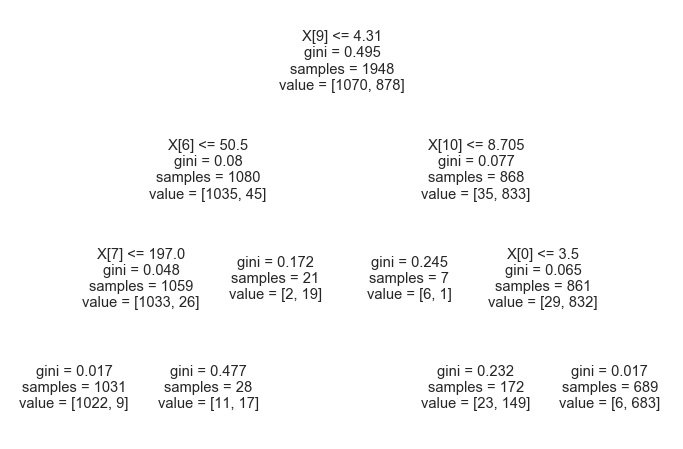

In [17]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

### - Compare Algorithms

Now it's time to compare the performance of different machine learning algorithms. We'll use 10-folds cross-validation to assess the performance of each model with the metric being the classification accuracy. Pipelines encompassing Standarization and PCA are used in order to avoid data leakage. Standarization is not performed for tree-based methods.

NB: 95.844171 (+/- 1.699697) performed in 3.605381 seconds
KNN: 95.279790 (+/- 2.060549) performed in 0.318564 seconds
CART: 97.127571 (+/- 1.606498) performed in 0.143908 seconds
LR: 95.586428 (+/- 1.922612) performed in 0.163318 seconds


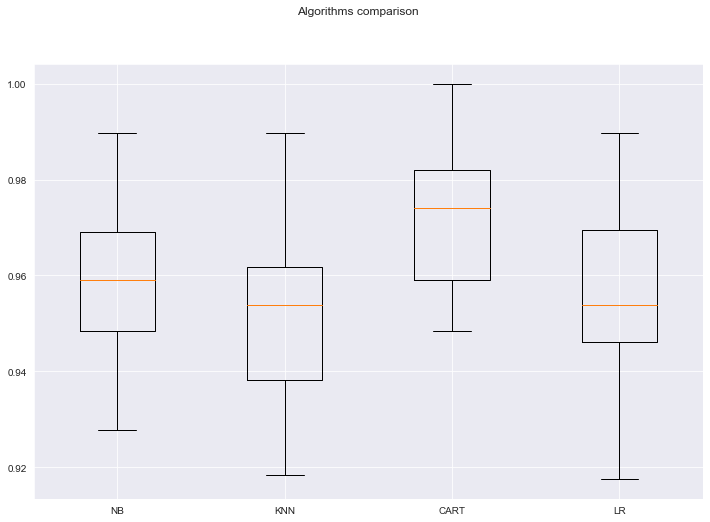

In [18]:
pipelines = []

#print(df.shape)
pipelines.append( ('NB',
                   Pipeline([
                              ('sc', StandardScaler()),
                             ('NB', GaussianNB())]) ) )


pipelines.append(('KNN',
                  Pipeline([ 
                               
                            ('KNN', KNeighborsClassifier()) ])))

pipelines.append( ('CART',
                   Pipeline([
                              ('sc', StandardScaler()),
                             ('CART', DecisionTreeClassifier(max_depth=3,min_samples_leaf=2,max_leaf_nodes=12, min_samples_split=22,random_state=10)) ]) ))

pipelines.append( ('LR',
                   Pipeline([
                              ('sc', StandardScaler()),
                             ('LR', LogisticRegression()) ]) ))



results, names, times  = [], [] , []
num_folds = 20
scoring = 'accuracy'

for name, model in pipelines:
    start = time()
    kfold = StratifiedKFold(n_splits=num_folds, random_state=101)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring = scoring,
                                n_jobs=-1) 
    t_elapsed = time() - start
    results.append(cv_results)
    names.append(name)
    times.append(t_elapsed)
    msg = "%s: %f (+/- %f) performed in %f seconds" % (name, 100*cv_results.mean(), 
                                                       100*cv_results.std(), t_elapsed)
    print(msg)


fig = plt.figure(figsize=(12,8))    
fig.suptitle("Algorithms comparison")
ax = fig.add_subplot(1,1,1)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

NB: 94.883721 (+/- 3.435217) performed in 0.140409 seconds
KNN: 93.974630 (+/- 3.681319) performed in 0.192879 seconds
CART: 98.181818 (+/- 2.226809) performed in 0.192918 seconds
LR: 94.199260 (+/- 3.553781) performed in 0.160898 seconds


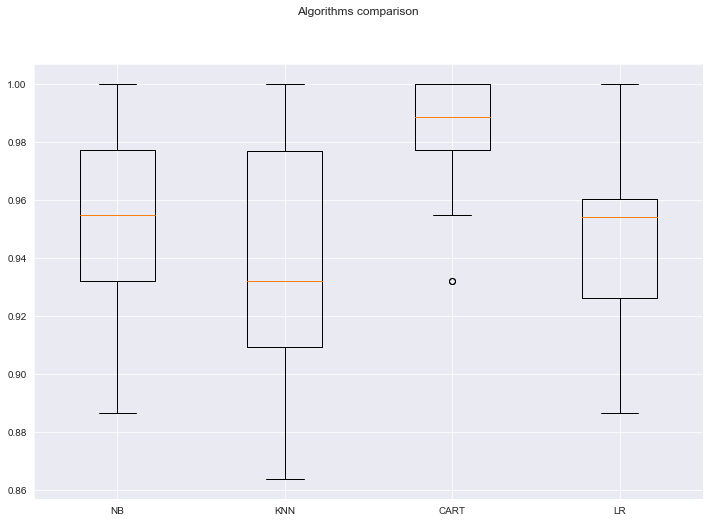

In [19]:
pipelines = []

#print(df.shape)
pipelines.append( ('NB',
                   Pipeline([
                              ('sc', StandardScaler()),
                             ('NB', GaussianNB())]) ) )


pipelines.append(('KNN',
                  Pipeline([ 
                               
                            ('KNN', KNeighborsClassifier()) ])))

pipelines.append( ('CART',
                   Pipeline([
                              ('sc', StandardScaler()),
                             ('CART', DecisionTreeClassifier(max_depth=3,min_samples_leaf=2,max_leaf_nodes=12, min_samples_split=22,random_state=10)) ]) ))

pipelines.append( ('LR',
                   Pipeline([
                              ('sc', StandardScaler()),
                             ('LR', LogisticRegression()) ]) ))



results, names, times  = [], [] , []
num_folds = 20
scoring = 'recall'

for name, model in pipelines:
    start = time()
    kfold = StratifiedKFold(n_splits=num_folds, random_state=101)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring = scoring,
                                n_jobs=-1) 
    t_elapsed = time() - start
    results.append(cv_results)
    names.append(name)
    times.append(t_elapsed)
    msg = "%s: %f (+/- %f) performed in %f seconds" % (name, 100*cv_results.mean(), 
                                                       100*cv_results.std(), t_elapsed)
    print(msg)


fig = plt.figure(figsize=(12,8))    
fig.suptitle("Algorithms comparison")
ax = fig.add_subplot(1,1,1)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


**Observation:** The best performances are achieved by RF. However, RF also yields a wide distribution. It is worthy to continue our study by tuning RF. 

Logistic Regression performs badly. This might be due to the fact that the data is not normally distributed as these algorithms perform well when data that is normally distributed.

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report 

In [21]:

X = BC[['Adress','Age','FBS', 'Urea','ALB', 'TCa', 'GPT','ALP','CA15','CEA','WBC','RBC','PLT','ESR','LDH']].values
y = BC['CLASS'].values


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.3, shuffle=True, random_state=42)


In [23]:
## StandardScaler

from sklearn.preprocessing import StandardScaler


std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.fit_transform(X_test)


In [24]:
# DataFrame to store classifier performance
performance = pd.DataFrame(columns=['Train_Recall','Test_Recall','Test_Specificity'])


 ---------------------------------------- 
 GaussianNB 
 ----------------------------------------
TRAIN GROUP

Cross-validation recall scores: [0.97368421 0.92105263 0.92105263 0.92105263 0.97368421 0.97368421
 0.94736842 0.94736842 0.94736842 1.         0.94736842 0.94736842
 0.94736842 0.97368421 1.         0.94736842 0.94736842 0.89473684
 0.94736842 1.        ]
Mean recall score: 0.9539473684210525

TEST GROUP

Recall: 0.9415384615384615


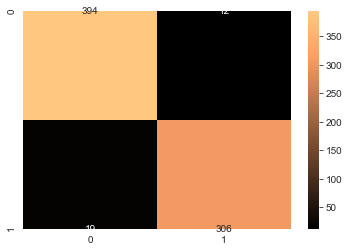


 ---------------------------------------- 
 LogisticRegression 
 ----------------------------------------
TRAIN GROUP

Cross-validation recall scores: [0.92105263 0.92105263 0.92105263 0.92105263 0.97368421 0.97368421
 0.94736842 0.94736842 0.94736842 1.         0.94736842 0.89473684
 0.94736842 0.97368421 1.         0.94736842 0.94736842 0.89473684
 0.94736842 0.97297297]
Mean recall score: 0.9473328591749641

TEST GROUP

Recall: 0.9353846153846154


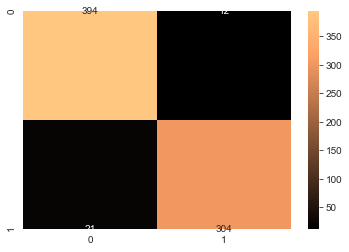


 ---------------------------------------- 
 DecisionTreeClassifier 
 ----------------------------------------
TRAIN GROUP

Cross-validation recall scores: [1.         0.94736842 1.         0.97368421 1.         0.97368421
 0.97368421 1.         1.         1.         1.         0.94736842
 0.97368421 1.         1.         1.         0.97368421 0.92105263
 0.94736842 1.        ]
Mean recall score: 0.9815789473684211

TEST GROUP

Recall: 0.9907692307692307


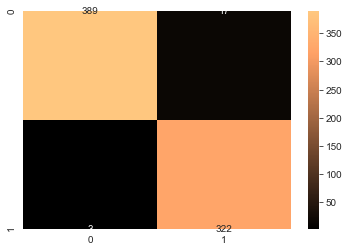


 ---------------------------------------- 
 KNeighborsClassifier 
 ----------------------------------------
TRAIN GROUP

Cross-validation recall scores: [0.97368421 0.92105263 0.92105263 0.94736842 1.         0.97368421
 0.94736842 0.97368421 0.94736842 1.         0.97368421 0.94736842
 0.97368421 0.97368421 1.         0.94736842 0.89473684 0.89473684
 0.94736842 1.        ]
Mean recall score: 0.9578947368421054

TEST GROUP

Recall: 0.963076923076923


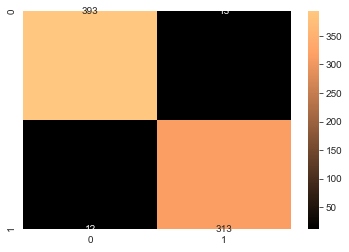

In [25]:
# Load simple classifiers
classifiers = [GaussianNB(),LogisticRegression(),
               DecisionTreeClassifier(max_depth=3,min_samples_leaf=2,max_leaf_nodes=12, min_samples_split=22,random_state=10),
               KNeighborsClassifier()]

# Get a classification report from each algorithm
for clf in classifiers:    
    
    # Heading
    print('\n','-'*40,'\n',clf.__class__.__name__,'\n','-'*40)
    
    # Cross-validate on the train data
    print("TRAIN GROUP")
    train_cv = cross_val_score(X=X_train, y=y_train, 
                               estimator=clf, scoring='recall',cv=20)
    print("\nCross-validation recall scores:",train_cv)
    print("Mean recall score:",train_cv.mean())

    # Now predict on the test group
    print("\nTEST GROUP")
    y_pred = clf.fit(X_train, y_train).predict(X_test)
    print("\nRecall:",recall_score(y_test,y_pred))
    
    # Print confusion matrix
    conf_matrix = confusion_matrix(y_test,y_pred)
    sns.heatmap(conf_matrix, annot=True,fmt='d', cmap=plt.cm.copper)
    plt.show()
    
    # Store results
    performance.loc[clf.__class__.__name__+'_default',
                    ['Train_Recall','Test_Recall','Test_Specificity']] = [
        train_cv.mean(),
        recall_score(y_test,y_pred),
        conf_matrix[0,0]/conf_matrix[0,:].sum()
    ]

In [26]:
# Scores obtained
performance

,Train_Recall,Test_Recall,Test_Specificity
GaussianNB_default,0.953947,0.941538,0.970443
LogisticRegression_default,0.947333,0.935385,0.970443
DecisionTreeClassifier_default,0.981579,0.990769,0.958128
KNeighborsClassifier_default,0.957895,0.963077,0.96798


In [27]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, f1_score,confusion_matrix


In [28]:
# DataFrame to store classifier performance
performance = pd.DataFrame(columns=['Train_accuracy','Test_accuracy','Test_Specificity'])


 ---------------------------------------- 
 GaussianNB 
 ----------------------------------------
TRAIN GROUP

Cross-validation accuracy scores: [0.97674419 0.93023256 0.94186047 0.95348837 0.97674419 0.95294118
 0.96470588 0.95294118 0.91764706 1.         0.95294118 0.94117647
 0.92941176 0.98823529 0.95294118 0.96470588 0.96470588 0.91764706
 0.96470588 0.96428571]
Mean recall score: 0.9554030682040258

TEST GROUP

accuracy: 0.957592339261286


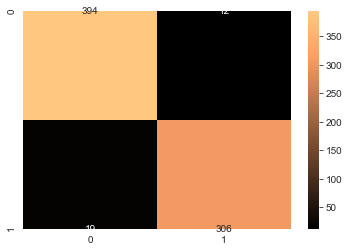


 ---------------------------------------- 
 LogisticRegression 
 ----------------------------------------
TRAIN GROUP

Cross-validation accuracy scores: [0.95348837 0.93023256 0.94186047 0.95348837 0.97674419 0.95294118
 0.96470588 0.95294118 0.91764706 1.         0.95294118 0.91764706
 0.92941176 0.98823529 0.97647059 0.96470588 0.96470588 0.91764706
 0.96470588 0.95238095]
Mean recall score: 0.9536450394111133

TEST GROUP

accuracy: 0.9548563611491108


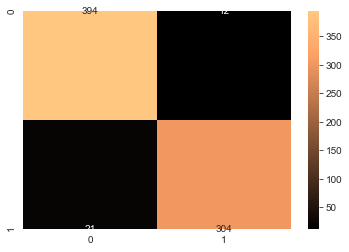


 ---------------------------------------- 
 DecisionTreeClassifier 
 ----------------------------------------
TRAIN GROUP

Cross-validation accuracy scores: [0.98837209 0.93023256 0.96511628 0.97674419 0.98837209 0.95294118
 0.97647059 0.95294118 0.95294118 1.         0.98823529 0.95294118
 0.92941176 0.96470588 0.98823529 1.         0.96470588 0.95294118
 0.96470588 0.95238095]
Mean recall score: 0.9671197316135757

TEST GROUP

accuracy: 0.9726402188782489


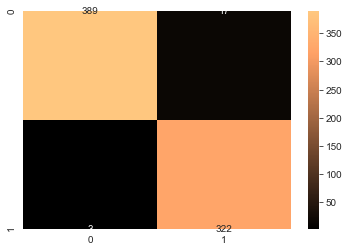


 ---------------------------------------- 
 KNeighborsClassifier 
 ----------------------------------------
TRAIN GROUP

Cross-validation accuracy scores: [0.97674419 0.93023256 0.94186047 0.97674419 0.98837209 0.95294118
 0.96470588 0.96470588 0.91764706 1.         0.96470588 0.95294118
 0.94117647 0.98823529 0.97647059 0.96470588 0.94117647 0.91764706
 0.96470588 0.96428571]
Mean recall score: 0.9595001954270079

TEST GROUP

accuracy: 0.9658002735978112


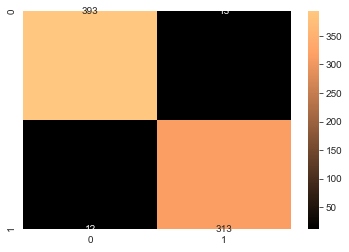

In [29]:
# Load simple classifiers
classifiers = [GaussianNB(),LogisticRegression(),
               DecisionTreeClassifier(max_depth=3,min_samples_leaf=2,max_leaf_nodes=12, min_samples_split=22,random_state=10),
               KNeighborsClassifier()]

# Get a classification report from each algorithm
for clf in classifiers:    
    
    # Heading
    print('\n','-'*40,'\n',clf.__class__.__name__,'\n','-'*40)
    
    # Cross-validate on the train data
    print("TRAIN GROUP")
    train_cv = cross_val_score(X=X_train, y=y_train, 
                               estimator=clf, scoring='accuracy',cv=20)
    print("\nCross-validation accuracy scores:",train_cv)
    print("Mean recall score:",train_cv.mean())

    # Now predict on the test group
    print("\nTEST GROUP")
    y_pred = clf.fit(X_train, y_train).predict(X_test)
    print("\naccuracy:",accuracy_score(y_test,y_pred))
    
    # Print confusion matrix
    conf_matrix = confusion_matrix(y_test,y_pred)
    sns.heatmap(conf_matrix, annot=True,fmt='d', cmap=plt.cm.copper)
    plt.show()
    
    # Store results
    performance.loc[clf.__class__.__name__+'_default',
                    ['Train_accuracy','Test_accuracy','Test_Specificity']] = [
        train_cv.mean(),
        recall_score(y_test,y_pred),
        conf_matrix[0,0]/conf_matrix[0,:].sum()
    ]

In [30]:
# Scores obtained
performance

,Train_accuracy,Test_accuracy,Test_Specificity
GaussianNB_default,0.955403,0.941538,0.970443
LogisticRegression_default,0.953645,0.935385,0.970443
DecisionTreeClassifier_default,0.96712,0.990769,0.958128
KNeighborsClassifier_default,0.9595,0.963077,0.96798


In [31]:
from sklearn.metrics import confusion_matrix,recall_score,precision_score,accuracy_score,precision_recall_curve,roc_curve,roc_auc_score,make_scorer


TRAIN GROUP

Cross-validation recall scores: [1.         0.94736842 1.         0.97368421 1.         0.97368421
 0.97368421 1.         1.         1.         1.         0.94736842
 0.97368421 1.         1.         1.         0.97368421 0.92105263
 0.94736842 1.        ]
Mean recall score: 0.9815789473684211

TEST GROUP

Recall: 0.9907692307692307

Classification report:

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       406
           1       0.95      0.99      0.97       325

    accuracy                           0.97       731
   macro avg       0.97      0.97      0.97       731
weighted avg       0.97      0.97      0.97       731



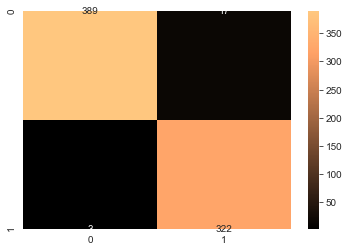

In [32]:
# Invoke classifier
DT_model =DecisionTreeClassifier(max_depth=3,min_samples_leaf=2,max_leaf_nodes=12, min_samples_split=22,random_state=10).fit(X_train,y_train)

# Make a scoring callable from recall_score
#accuracy = make_scorer(accuracy_score)
recall = make_scorer(recall_score)

# Cross-validate on the train data
train_cv = cross_val_score(X=X_train,y=y_train,estimator=DT_model,scoring=recall,cv=20)
print("TRAIN GROUP")
print("\nCross-validation recall scores:",train_cv)
print("Mean recall score:",train_cv.mean())

# Now predict on the test group
print("\nTEST GROUP")
y_pred = DT_model.fit(X_train, y_train).predict(X_test)
print("\nRecall:",recall_score(y_test,y_pred))

# Classification report
print('\nClassification report:\n')
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix, annot=True,fmt='d', cmap=plt.cm.copper)
plt.show()

In [33]:
# run DecisionTree  with 10 fold cross validation

DT_model =DecisionTreeClassifier(max_depth=3,min_samples_leaf=2,max_leaf_nodes=12, min_samples_split=22,random_state=10).fit(X_train,y_train)

DT_model.score(X_test,y_test)

0.9726402188782489

In [34]:
preds = DT_model.predict(X_test)

pd.DataFrame(confusion_matrix(y_test,preds))

,0,1
0,389,17
1,3,322


On the rows, we have predicted values, and on the columns we have the actual values. 1 denotes heart disease present.

* On the diagonal we have cases we have predicted accurately (positions 0,0 and 1,1). These are what are summed and divided by all cases to compute overall accuracy.
* On the off-diagonal (right to left) we have cases we have predicted inaccurately. 

We also have cases where we have:
* predicted 1 but they were actually 0; **false positives** (position 1,0)
* predicted 0 but they were actually 1; **false negatives** (position 0,1)

To better assess performance, we can use these values from the confusion matrix to compute **precision** and **recall**. 

* Precision: of all cases we predict as true, how many did we get right (TP/TP + FP). 
* Recall: of all the actually true cases, how many did we get right (TP/TP + FN).

We can calculate precision and recall for our model, and compare this to our overall acuracy score already computed.

In [35]:
print('Recall score\n')
print(recall_score(y_test,preds))
print('\nPrecision score: \n')
print(precision_score(y_test,preds))
print('\nAccuracy score \n')
print(accuracy_score(y_test,preds))


Recall score

0.9907692307692307

Precision score: 

0.9498525073746312

Accuracy score 

0.9726402188782489


In [36]:
from sklearn.metrics import confusion_matrix


thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in thresholds:
    predictions = DT_model.predict_proba(X_test)
    predictions = (predictions[::,1])> i
    cm = confusion_matrix(y_test, predictions)
    tp = cm[1,1]
    fn = cm[1,0]
    print('Recall with threshold = %s :'%i, (tp/(tp+fn)))

Recall with threshold = 0.1 : 0.9907692307692307
Recall with threshold = 0.2 : 0.9907692307692307
Recall with threshold = 0.3 : 0.9907692307692307
Recall with threshold = 0.4 : 0.9907692307692307
Recall with threshold = 0.5 : 0.9907692307692307
Recall with threshold = 0.6 : 0.9907692307692307
Recall with threshold = 0.7 : 0.9692307692307692
Recall with threshold = 0.8 : 0.9692307692307692
Recall with threshold = 0.9 : 0.7876923076923077


In [37]:
#هذا التحسين المطلوب

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       406
           1       0.95      0.99      0.97       325

    accuracy                           0.97       731
   macro avg       0.97      0.97      0.97       731
weighted avg       0.97      0.97      0.97       731



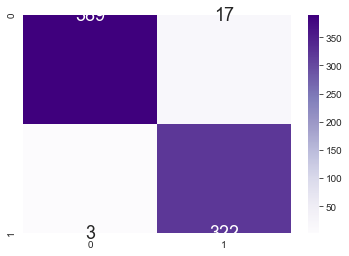

In [38]:
#Predicting with threshold = 0.6
from sklearn.metrics import classification_report, accuracy_score, make_scorer

y_score = DT_model.predict_proba(X_test)[:,1] > 0.6

print(classification_report(y_test, y_score))

conf_m = confusion_matrix(y_test, y_score)

sns.heatmap(conf_m, annot=True, fmt='g', annot_kws={"fontsize":18}, cmap='Purples')
plt.show()

## 4. Precision-Recall trade off

There is a trade off taking place here; would we rather have high precision, where our predictions of positive cases are very accurate but perhaps a few actual true cases are missed, or would we rather have high recall, in which very few actual true cases are missed?

This is called the **Precision - Recall trade off**, and the answer depends on our data set/situation. If we think about the dataset we are dealing with, missing a case of heart disease and leaving that patient untreated is probably worse than calling a few extra people back who don't have heart disease but who the model would flag up; we are willing to accept more false positives than false negatives. Here therefore, we would rather have high recall than high precision. 


But how do we change the number of false positives/false negatives our model produces? Ultimately, our logistic regression estimated for each patient, how likely it was that there was heart disease present. The default decision boundary is 0.5; if the model considers the probabilty of heart disease being present to be > 50%, it will classify as true, if < 50% it will classify as false. By changing this decision boundary, we will change the number of false positives and false negatives, and hence the values of precision and recall.

## 5. Plotting the Precision-Recall Curve

We can actually plot the values of precision and recall our model will produce for every value of the decision boundary. I do this two ways below; first of all using the sklearn 'precision_recall_curve' which doesn't seem to give much granularity, followed by a manual more granular plot.


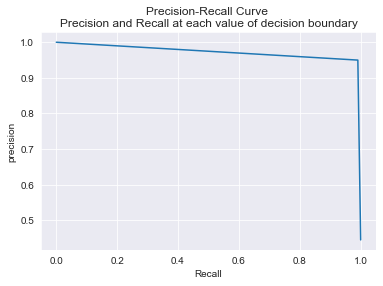

In [39]:
precision,recall,thresholds = precision_recall_curve(y_test,preds)

plt.figure()
plt.plot(recall,precision)
plt.title('Precision-Recall Curve \nPrecision and Recall at each value of decision boundary')
plt.xlabel('Recall')
_ = plt.ylabel('precision')

In [40]:
yprobs = DT_model.predict_proba(X_test)
yprobs = pd.DataFrame(yprobs)
precision = []
recall = []
accuracy = []

# calculate precision and accuracy at each value of threshold - only to 0.99 because no true values are predicted at 100% confidence!
for t in np.arange(0,0.99,0.01):
    tmp = yprobs
    tmp['CLASS'] = np.where(yprobs.iloc[:,1] >= t,1,0)
    
    precision.append(precision_score(y_test,tmp['CLASS']))
    recall.append(recall_score(y_test,tmp['CLASS']))
    accuracy.append(accuracy_score(y_test,tmp['CLASS']))


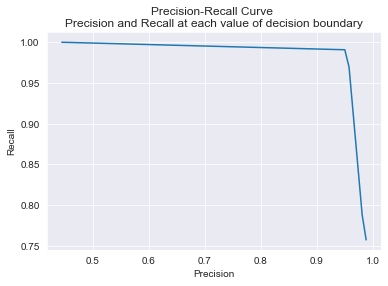

In [41]:
plt.figure()
plt.plot(precision,recall)
plt.title('Precision-Recall Curve \nPrecision and Recall at each value of decision boundary')
plt.xlabel('Precision')
_ = plt.ylabel('Recall')

We can see in the chart above, that where recall is 1, we have to accept lower levels of precision; in order to pick up more and more cases of heart disease, we have to accept lower accuracy in the ones we predict. However, at higher rates of precision, recall falls; if we want to only predict cases of heart disease where we are sure we are right, we are going to miss some more borderline cases. 

We could also plot for each level of the decision boundary, what would be our precision, recall AND overall accuracy.

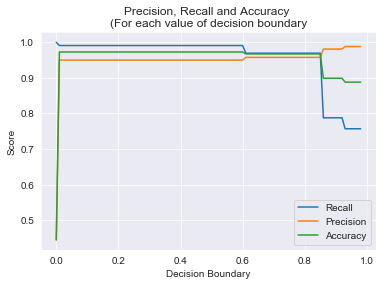

In [42]:
plt.figure()
plt.plot(np.arange(0,0.99,0.01),recall,label = 'Recall')
plt.plot(np.arange(0,0.99,0.01),precision,label = 'Precision')
plt.plot(np.arange(0,0.99,0.01),accuracy,label = 'Accuracy')
plt.title('Precision, Recall and Accuracy \n(For each value of decision boundary')
plt.xlabel('Decision Boundary')
plt.ylabel('Score')
_= plt.legend()

In the chart above, we can see precision and recall each plotted as a function of the decision boundary value. We can see clearly now, that the higher (more strict) the decision boundary for classifying heart disease, the higher our precision score, whilst lower (less strict) decision boundary values will result in a higher recall score. 

We can now also add in a line for total accuracy, which we can see rises up until about a decision boundary value of 0.6, and then begins to fall.

## 6. ROC curves and AUC (area under curve)

Precision-Recall curves are useful, but not the only way we can assess our model's performance. We can also plot what is known as an ROC curve, which essentially plots:
* **false positive rate** (how many patients falsely predicted as positive out of all actually negative cases: FP/TN + FP) 

against the

* **true positive rate** (same as recall - out of all actually true cases how many did we accurately predict: TP/TP + FN)

Like with the precision recall trade off, we can calculate our false positive and true positive rate for every value of the decision boundary and plot this as a curve. To illustrate this more, it is easiest to draw the curve.

## 7. Plotting the ROC curve

Again, we can use a built in method, which I do first, or a more granular manual method.

0.9744486547934823

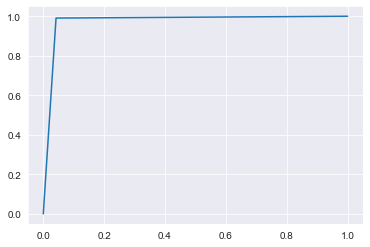

In [43]:
fpr,tpr,_ = roc_curve(y_test,preds,drop_intermediate = True)

plt.figure()
plt.plot(fpr,tpr)
roc_auc_score(y_test,y_pred)


In [44]:
fpr = []
tpr = recall

for t in np.arange(0,0.99,0.01):
    yprobs['CLASS'] = np.where(yprobs.iloc[:,1] >=t,1,0)
    cm = confusion_matrix(yprobs['CLASS'],y_test)
    tp = cm[1,1]
    fp = cm[1,0]
    tn = cm[0,0]
    fn = cm[0,1]
    
    fpr.append(fp/(tn+fp))

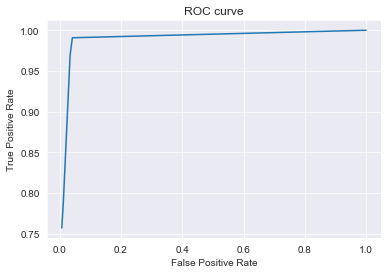

In [45]:
plt.figure()

plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
_ = plt.title('ROC curve')


The ideal here, is to have the ROC curve as far into the top left as possible; we want to have a high true positive rate with as low a false positive rate as possible. We can measure how good our model is by calculating this area under the curve. This is helpful when we compare models.

In [46]:
print('AUC (area under curve) Score: {}'.format(roc_auc_score(y_test,y_pred)))

AUC (area under curve) Score: 0.9744486547934823


### Tuning DT_KFold

For random forest, we can tune the number of grown trees (n_estimators), the trees' depth (max_depth), the criterion of splitting (gini or entropy) and so on.... Let's start tuning these.

In [47]:
from sklearn.model_selection import RepeatedStratifiedKFold


In [48]:
# Create a pipeline with a Random forest classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier()

#  GridSearchCV & KFold طريقة 2


kf =KFold(n_splits=20, shuffle=True, random_state=0)

gs = GridSearchCV(model,
                  param_grid = {'max_depth': range(1, 30),
                                'min_samples_split': range(2, 30, 10),
                               'max_leaf_nodes':range(2, 30, 10),
                                'min_samples_leaf':range(2, 30, 10),
                               'random_state':range(10, 30, 10)},
                  cv=kf,
                  n_jobs=-1,
                  verbose = 1,
                  scoring='accuracy')

gs.fit(X_train, y_train)

print(gs.best_params_)

print(gs.best_score_)



Fitting 20 folds for each of 1566 candidates, totalling 31320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1812 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 11112 tasks      | elapsed:   29.4s
[Parallel(n_jobs=-1)]: Done 22854 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 28104 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 31320 out of 31320 | elapsed:  1.7min finished


{'max_depth': 7, 'max_leaf_nodes': 12, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 10}
0.9700704225352113


## 6) Diagnose the performance of the best algorithms

### Diagnose overfitting by plotting the learning and validation curves

In [49]:
# Let's define some utility functions to plot the learning & validation curves

def plot_learning_curve(train_sizes, train_scores, test_scores, title, alpha=0.1):
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.plot(train_sizes, train_mean, label='train score', color='blue', marker='o')
    plt.fill_between(train_sizes,train_mean + train_std,
                    train_mean - train_std, color='blue', alpha=alpha)
    plt.plot(train_sizes, test_mean, label='test score', color='red',marker='o')
    plt.fill_between(train_sizes,test_mean + test_std, test_mean - test_std , color='red', alpha=alpha)
    plt.title(title)
    plt.xlabel('Number of training points')
    plt.ylabel('Accuracy')
    plt.grid(ls='--')
    plt.legend(loc='best')
    plt.show()    
    
def plot_validation_curve(param_range, train_scores, test_scores, title, alpha=0.1):
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.plot(param_range, train_mean, label='train score', color='blue', marker='o')
    plt.fill_between(param_range,train_mean + train_std,
                    train_mean - train_std, color='blue', alpha=alpha)
    plt.plot(param_range, test_mean, label='test score', color='red', marker='o')
    plt.fill_between(param_range,test_mean + test_std, test_mean - test_std , color='red', alpha=alpha)
    plt.title(title)
    plt.grid(ls='--')
    plt.xlabel('Parameter value')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.show()    

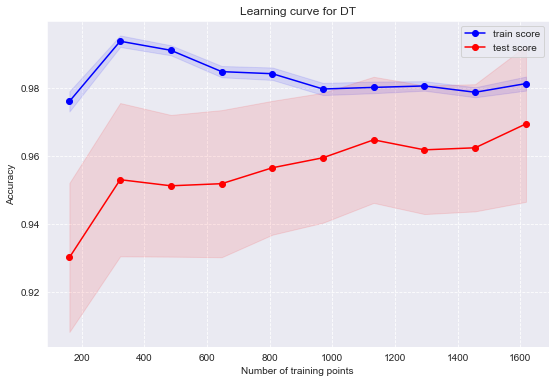

In [50]:
plt.figure(figsize=(9,6))

train_sizes, train_scores, test_scores = learning_curve(
              estimator= gs.best_estimator_ , X= X_train, y = y_train, 
                train_sizes=np.arange(0.1,1.1,0.1), cv= 20,  scoring='accuracy', n_jobs= - 1)

plot_learning_curve(train_sizes, train_scores, test_scores, title='Learning curve for DT')

The algorithm suffers from high variance.

### Tuning DT_RepeatedStratifiedKFold

For random forest, we can tune the number of grown trees (n_estimators), the trees' depth (max_depth), the criterion of splitting (gini or entropy) and so on.... Let's start tuning these.

In [51]:
# Create a pipeline with a Random forest classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier()

#  GridSearchCV & KFold طريقة 2


kf =RepeatedStratifiedKFold(n_splits=20, n_repeats=3, random_state=1)

gs = GridSearchCV(model,
                  param_grid = {'max_depth': range(1, 30),
                                'min_samples_split': range(2, 30, 10),
                               'max_leaf_nodes':range(2, 30, 10),
                                'min_samples_leaf':range(2, 30, 10),
                               'random_state':range(10, 30, 10)},
                  cv=kf,
                  n_jobs=-1,
                  verbose = 1,
                  scoring='accuracy')

gs.fit(X_train, y_train)

print(gs.best_params_)

print(gs.best_score_)



Fitting 60 folds for each of 1566 candidates, totalling 93960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1028 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 5528 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 9503 tasks      | elapsed:   25.4s
[Parallel(n_jobs=-1)]: Done 14338 tasks      | elapsed:   46.0s
[Parallel(n_jobs=-1)]: Done 20638 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 28268 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 38018 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 49691 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 63291 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 78491 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 93960 out of 93960 | elapsed:  7.0min finished


{'max_depth': 7, 'max_leaf_nodes': 12, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 20}
0.9720266040688575


## 6) Diagnose the performance of the best algorithms

### Diagnose overfitting by plotting the learning and validation curves

In [52]:
# Let's define some utility functions to plot the learning & validation curves

def plot_learning_curve(train_sizes, train_scores, test_scores, title, alpha=0.1):
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.plot(train_sizes, train_mean, label='train score', color='blue', marker='o')
    plt.fill_between(train_sizes,train_mean + train_std,
                    train_mean - train_std, color='blue', alpha=alpha)
    plt.plot(train_sizes, test_mean, label='test score', color='red',marker='o')
    plt.fill_between(train_sizes,test_mean + test_std, test_mean - test_std , color='red', alpha=alpha)
    plt.title(title)
    plt.xlabel('Number of training points')
    plt.ylabel('Accuracy')
    plt.grid(ls='--')
    plt.legend(loc='best')
    plt.show()    
    
def plot_validation_curve(param_range, train_scores, test_scores, title, alpha=0.1):
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.plot(param_range, train_mean, label='train score', color='blue', marker='o')
    plt.fill_between(param_range,train_mean + train_std,
                    train_mean - train_std, color='blue', alpha=alpha)
    plt.plot(param_range, test_mean, label='test score', color='red', marker='o')
    plt.fill_between(param_range,test_mean + test_std, test_mean - test_std , color='red', alpha=alpha)
    plt.title(title)
    plt.grid(ls='--')
    plt.xlabel('Parameter value')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.show()    

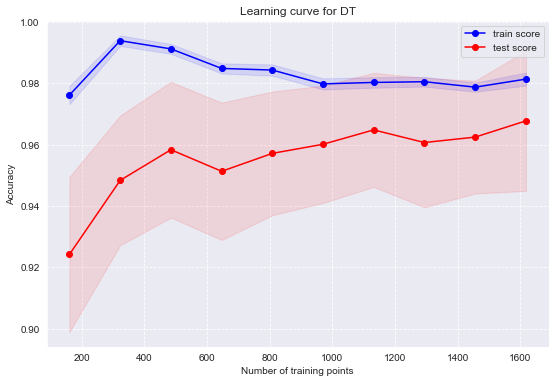

In [53]:
plt.figure(figsize=(9,6))

train_sizes, train_scores, test_scores = learning_curve(
              estimator= gs.best_estimator_ , X= X_train, y = y_train, 
                train_sizes=np.arange(0.1,1.1,0.1), cv= 20,  scoring='accuracy', n_jobs= - 1)

plot_learning_curve(train_sizes, train_scores, test_scores, title='Learning curve for DT')

The algorithm suffers from high variance.

### Tuning DT_StratifiedKFold

For random forest, we can tune the number of grown trees (n_estimators), the trees' depth (max_depth), the criterion of splitting (gini or entropy) and so on.... Let's start tuning these.

In [54]:
# Create a pipeline with a Random forest classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier()

#  GridSearchCV & KFold طريقة 2

num_splits=20
kf =StratifiedKFold(num_splits, shuffle= True, random_state = 101)

gs = GridSearchCV(model,
                  param_grid = {'max_depth': range(1, 30),
                                'min_samples_split': range(2, 30, 10),
                               'max_leaf_nodes':range(2, 30, 10),
                                'min_samples_leaf':range(2, 30, 10),
                               'random_state':range(10, 30, 10)},
                  cv=kf,
                  n_jobs=-1,
                  verbose = 1,
                  scoring='accuracy')

gs.fit(X_train, y_train)

print(gs.best_params_)

print(gs.best_score_)



Fitting 20 folds for each of 1566 candidates, totalling 31320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 6652 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done 11827 tasks      | elapsed:   45.5s
[Parallel(n_jobs=-1)]: Done 17077 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 23827 tasks      | elapsed:  1.7min


{'max_depth': 6, 'max_leaf_nodes': 12, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 10}
0.9683098591549296


[Parallel(n_jobs=-1)]: Done 31320 out of 31320 | elapsed:  2.3min finished


## 6) Diagnose the performance of the best algorithms

### Diagnose overfitting by plotting the learning and validation curves

In [55]:
# Let's define some utility functions to plot the learning & validation curves

def plot_learning_curve(train_sizes, train_scores, test_scores, title, alpha=0.1):
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.plot(train_sizes, train_mean, label='train score', color='blue', marker='o')
    plt.fill_between(train_sizes,train_mean + train_std,
                    train_mean - train_std, color='blue', alpha=alpha)
    plt.plot(train_sizes, test_mean, label='test score', color='red',marker='o')
    plt.fill_between(train_sizes,test_mean + test_std, test_mean - test_std , color='red', alpha=alpha)
    plt.title(title)
    plt.xlabel('Number of training points')
    plt.ylabel('Accuracy')
    plt.grid(ls='--')
    plt.legend(loc='best')
    plt.show()    
    
def plot_validation_curve(param_range, train_scores, test_scores, title, alpha=0.1):
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.plot(param_range, train_mean, label='train score', color='blue', marker='o')
    plt.fill_between(param_range,train_mean + train_std,
                    train_mean - train_std, color='blue', alpha=alpha)
    plt.plot(param_range, test_mean, label='test score', color='red', marker='o')
    plt.fill_between(param_range,test_mean + test_std, test_mean - test_std , color='red', alpha=alpha)
    plt.title(title)
    plt.grid(ls='--')
    plt.xlabel('Parameter value')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.show()    

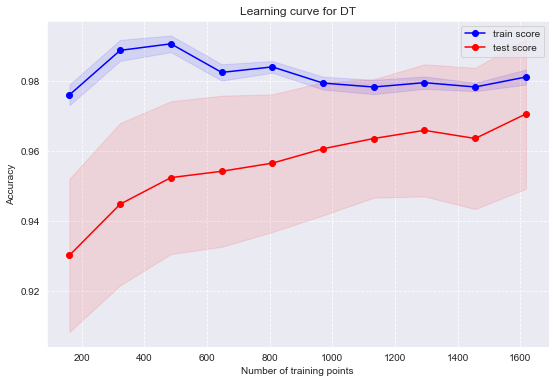

In [56]:
plt.figure(figsize=(9,6))

train_sizes, train_scores, test_scores = learning_curve(
              estimator= gs.best_estimator_ , X= X_train, y = y_train, 
                train_sizes=np.arange(0.1,1.1,0.1), cv= 20,  scoring='accuracy', n_jobs= - 1)

plot_learning_curve(train_sizes, train_scores, test_scores, title='Learning curve for DT')

The algorithm suffers from high variance.

### Tuning DT_KFold_Recall

For random forest, we can tune the number of grown trees (n_estimators), the trees' depth (max_depth), the criterion of splitting (gini or entropy) and so on.... Let's start tuning these.

In [57]:
from sklearn.model_selection import RepeatedStratifiedKFold


In [58]:
# Create a pipeline with a Random forest classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier()

#  GridSearchCV & KFold طريقة 2


kf =KFold(n_splits=20, shuffle=True, random_state=0)

gs = GridSearchCV(model,
                  param_grid = {'max_depth': range(1, 30),
                                'min_samples_split': range(2, 30, 10),
                               'max_leaf_nodes':range(2, 30, 10),
                                'min_samples_leaf':range(2, 30, 10),
                               'random_state':range(10, 30, 10)},
                  cv=kf,
                  n_jobs=-1,
                  verbose = 1,
                  scoring='recall')

gs.fit(X_train, y_train)

print(gs.best_params_)

print(gs.best_score_)



Fitting 20 folds for each of 1566 candidates, totalling 31320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1572 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 5714 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done 8964 tasks      | elapsed:   35.2s
[Parallel(n_jobs=-1)]: Done 13514 tasks      | elapsed:   57.3s
[Parallel(n_jobs=-1)]: Done 19364 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 26514 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 31320 out of 31320 | elapsed:  2.4min finished


{'max_depth': 3, 'max_leaf_nodes': 12, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 10}
0.9841451582198621


## 6) Diagnose the performance of the best algorithms

### Diagnose overfitting by plotting the learning and validation curves

In [59]:
# Let's define some utility functions to plot the learning & validation curves

def plot_learning_curve(train_sizes, train_scores, test_scores, title, alpha=0.1):
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.plot(train_sizes, train_mean, label='train score', color='blue', marker='o')
    plt.fill_between(train_sizes,train_mean + train_std,
                    train_mean - train_std, color='blue', alpha=alpha)
    plt.plot(train_sizes, test_mean, label='test score', color='red',marker='o')
    plt.fill_between(train_sizes,test_mean + test_std, test_mean - test_std , color='red', alpha=alpha)
    plt.title(title)
    plt.xlabel('Number of training points')
    plt.ylabel('Accuracy')
    plt.grid(ls='--')
    plt.legend(loc='best')
    plt.show()    
    
def plot_validation_curve(param_range, train_scores, test_scores, title, alpha=0.1):
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.plot(param_range, train_mean, label='train score', color='blue', marker='o')
    plt.fill_between(param_range,train_mean + train_std,
                    train_mean - train_std, color='blue', alpha=alpha)
    plt.plot(param_range, test_mean, label='test score', color='red', marker='o')
    plt.fill_between(param_range,test_mean + test_std, test_mean - test_std , color='red', alpha=alpha)
    plt.title(title)
    plt.grid(ls='--')
    plt.xlabel('Parameter value')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.show()    

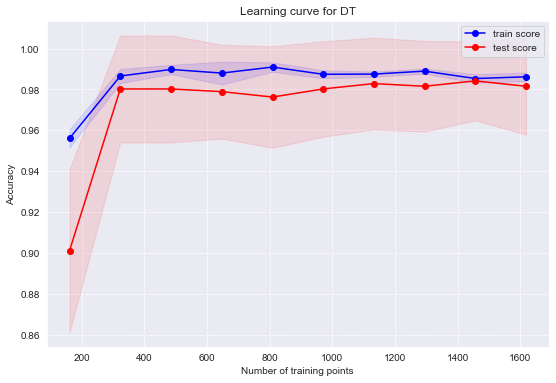

In [60]:
plt.figure(figsize=(9,6))

train_sizes, train_scores, test_scores = learning_curve(
              estimator= gs.best_estimator_ , X= X_train, y = y_train, 
                train_sizes=np.arange(0.1,1.1,0.1), cv= 20,  scoring='recall', n_jobs= - 1)

plot_learning_curve(train_sizes, train_scores, test_scores, title='Learning curve for DT')